In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load dataset

Untuk hands-on kita akan melihat dataset sintetik prediksi kebotakan. Agar running time-nya tidak terlalu lama, kali ini kita ambil sampel 1000 baris data saja.

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

# Descriptive Statistics

## Memeriksa kolom-kolom dan nilai hilang dengan `df.info()`

Hal pertama yang biasanya dilakukan dalam EDA adalah mengecek tipe data setiap kolom dan jumlah nilai yang hilang. Hal ini bisa kita lakukan dengan menggunakan `df.info()`.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Sampling untuk memahami data dengan `df.sample()`

In [10]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8482,8483,15756655,Madukaife,632,France,Female,34,2,0.00,2,0,0,165385.55,0
3317,3318,15575119,Hughes,779,France,Male,71,3,0.00,2,1,1,146895.36,1
9611,9612,15586522,Hunter,608,Spain,Male,37,2,130461.02,1,1,0,21967.15,0
7379,7380,15607746,Belstead,573,France,Female,36,1,0.00,1,1,1,56905.38,0
5904,5905,15664270,Balsillie,692,Germany,Male,45,6,142084.04,4,1,0,188305.85,1


In [11]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['Surname', 'Geography', 'Gender']
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

In [12]:
df[nums].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df[cats].describe()

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [14]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Surname:
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

Value count kolom Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Value count kolom Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2096429990.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2096429990.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2096429990.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2096429990.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2096429990.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2096429990.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2096429990.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Leno

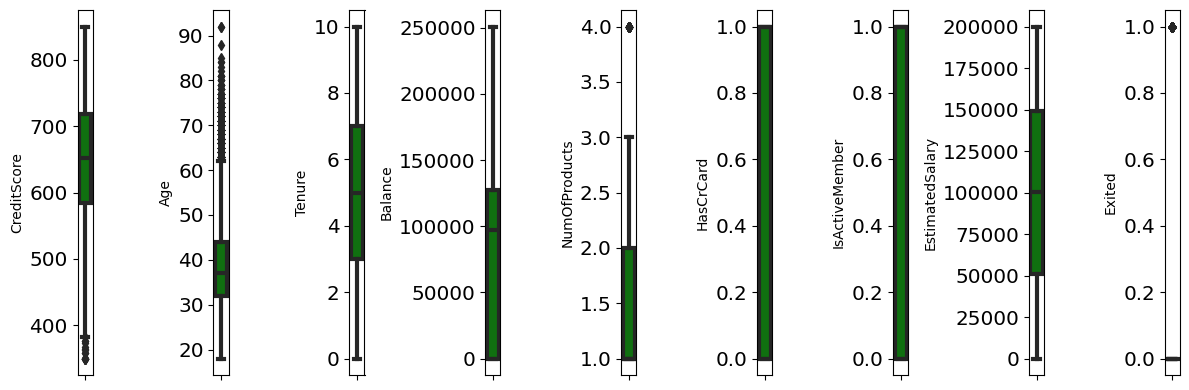

In [19]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\946389498.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]], color='green')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\946389498.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]], color='green')
C:\Users\Lenov

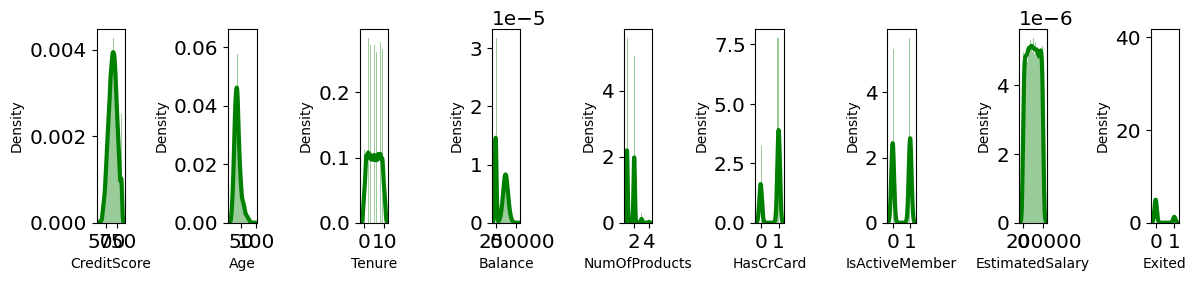

In [20]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\4042219118.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\4042219118.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\4042219118.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\4042219118.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\4042219118.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\4042219118.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\4042219118.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Leno

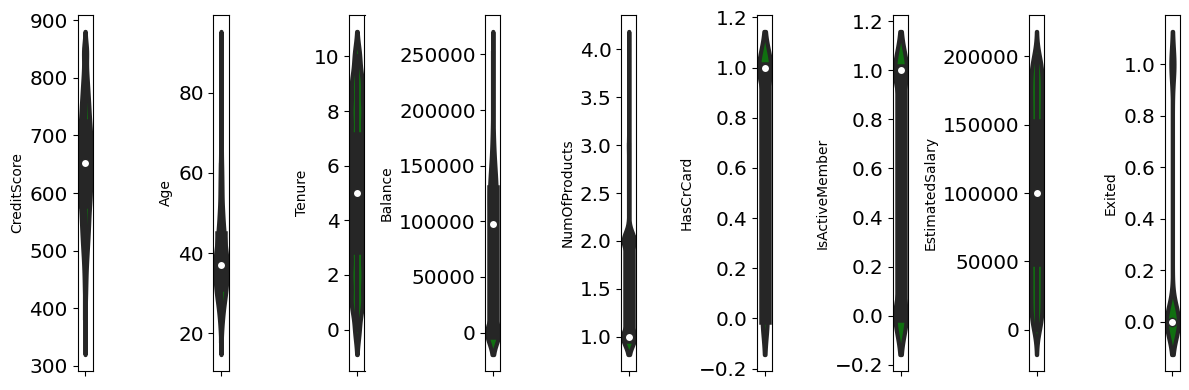

In [24]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

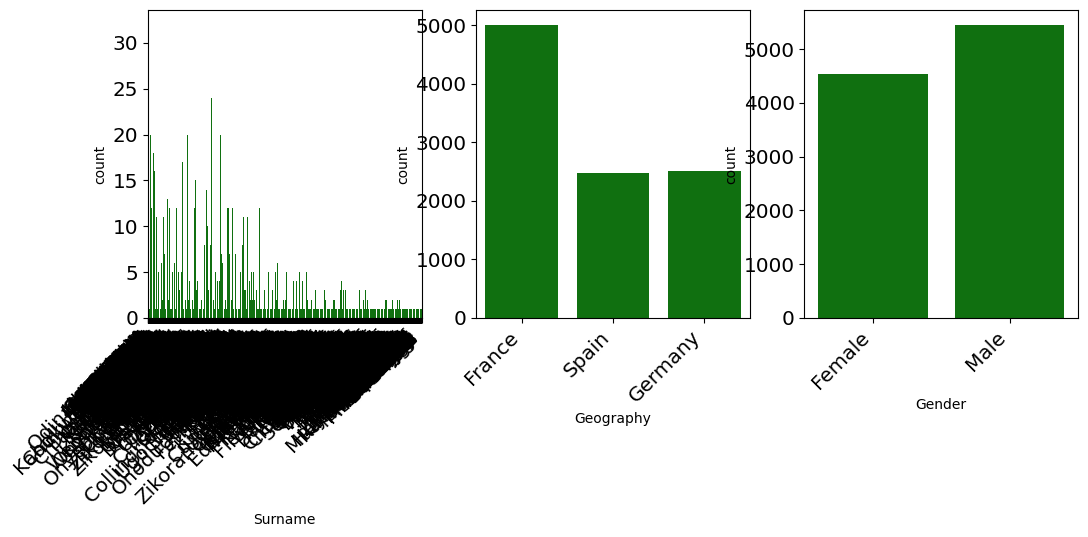

In [38]:
for i in range(0, len(cats)):
  plt.subplot(1, len(cats), i+1)
  sns.countplot(x=df[cats[i]], color='green')
  plt.tight_layout
  plt.xticks(rotation=45, ha='right')

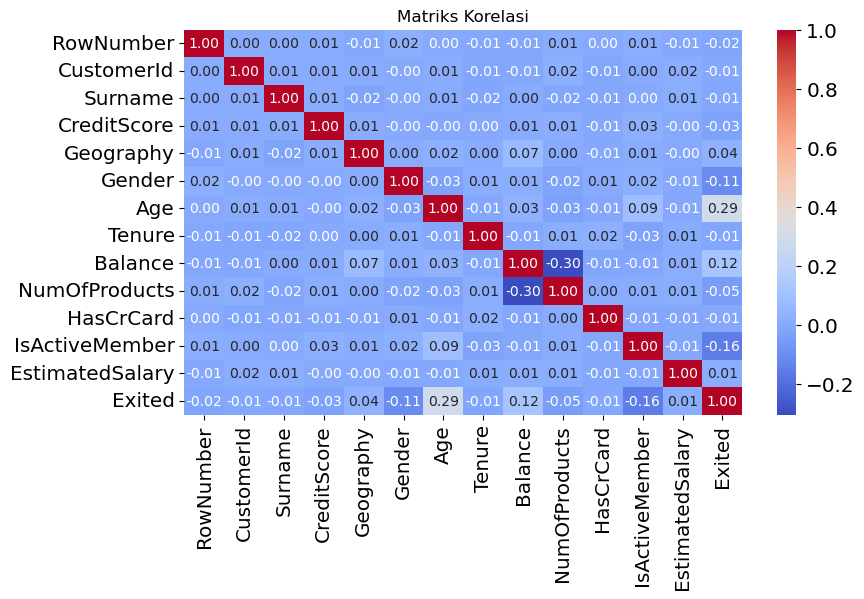

In [43]:
# Inisialisasi LabelEncoder untuk kolom 'brand' dan 'category'
label_encoder = LabelEncoder()

# Konversi kolom objek 'brand' dan 'category' ke tipe data numerik
df['Surname'] = label_encoder.fit_transform(df['Surname'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Plot matriks korelasi menggunakan heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

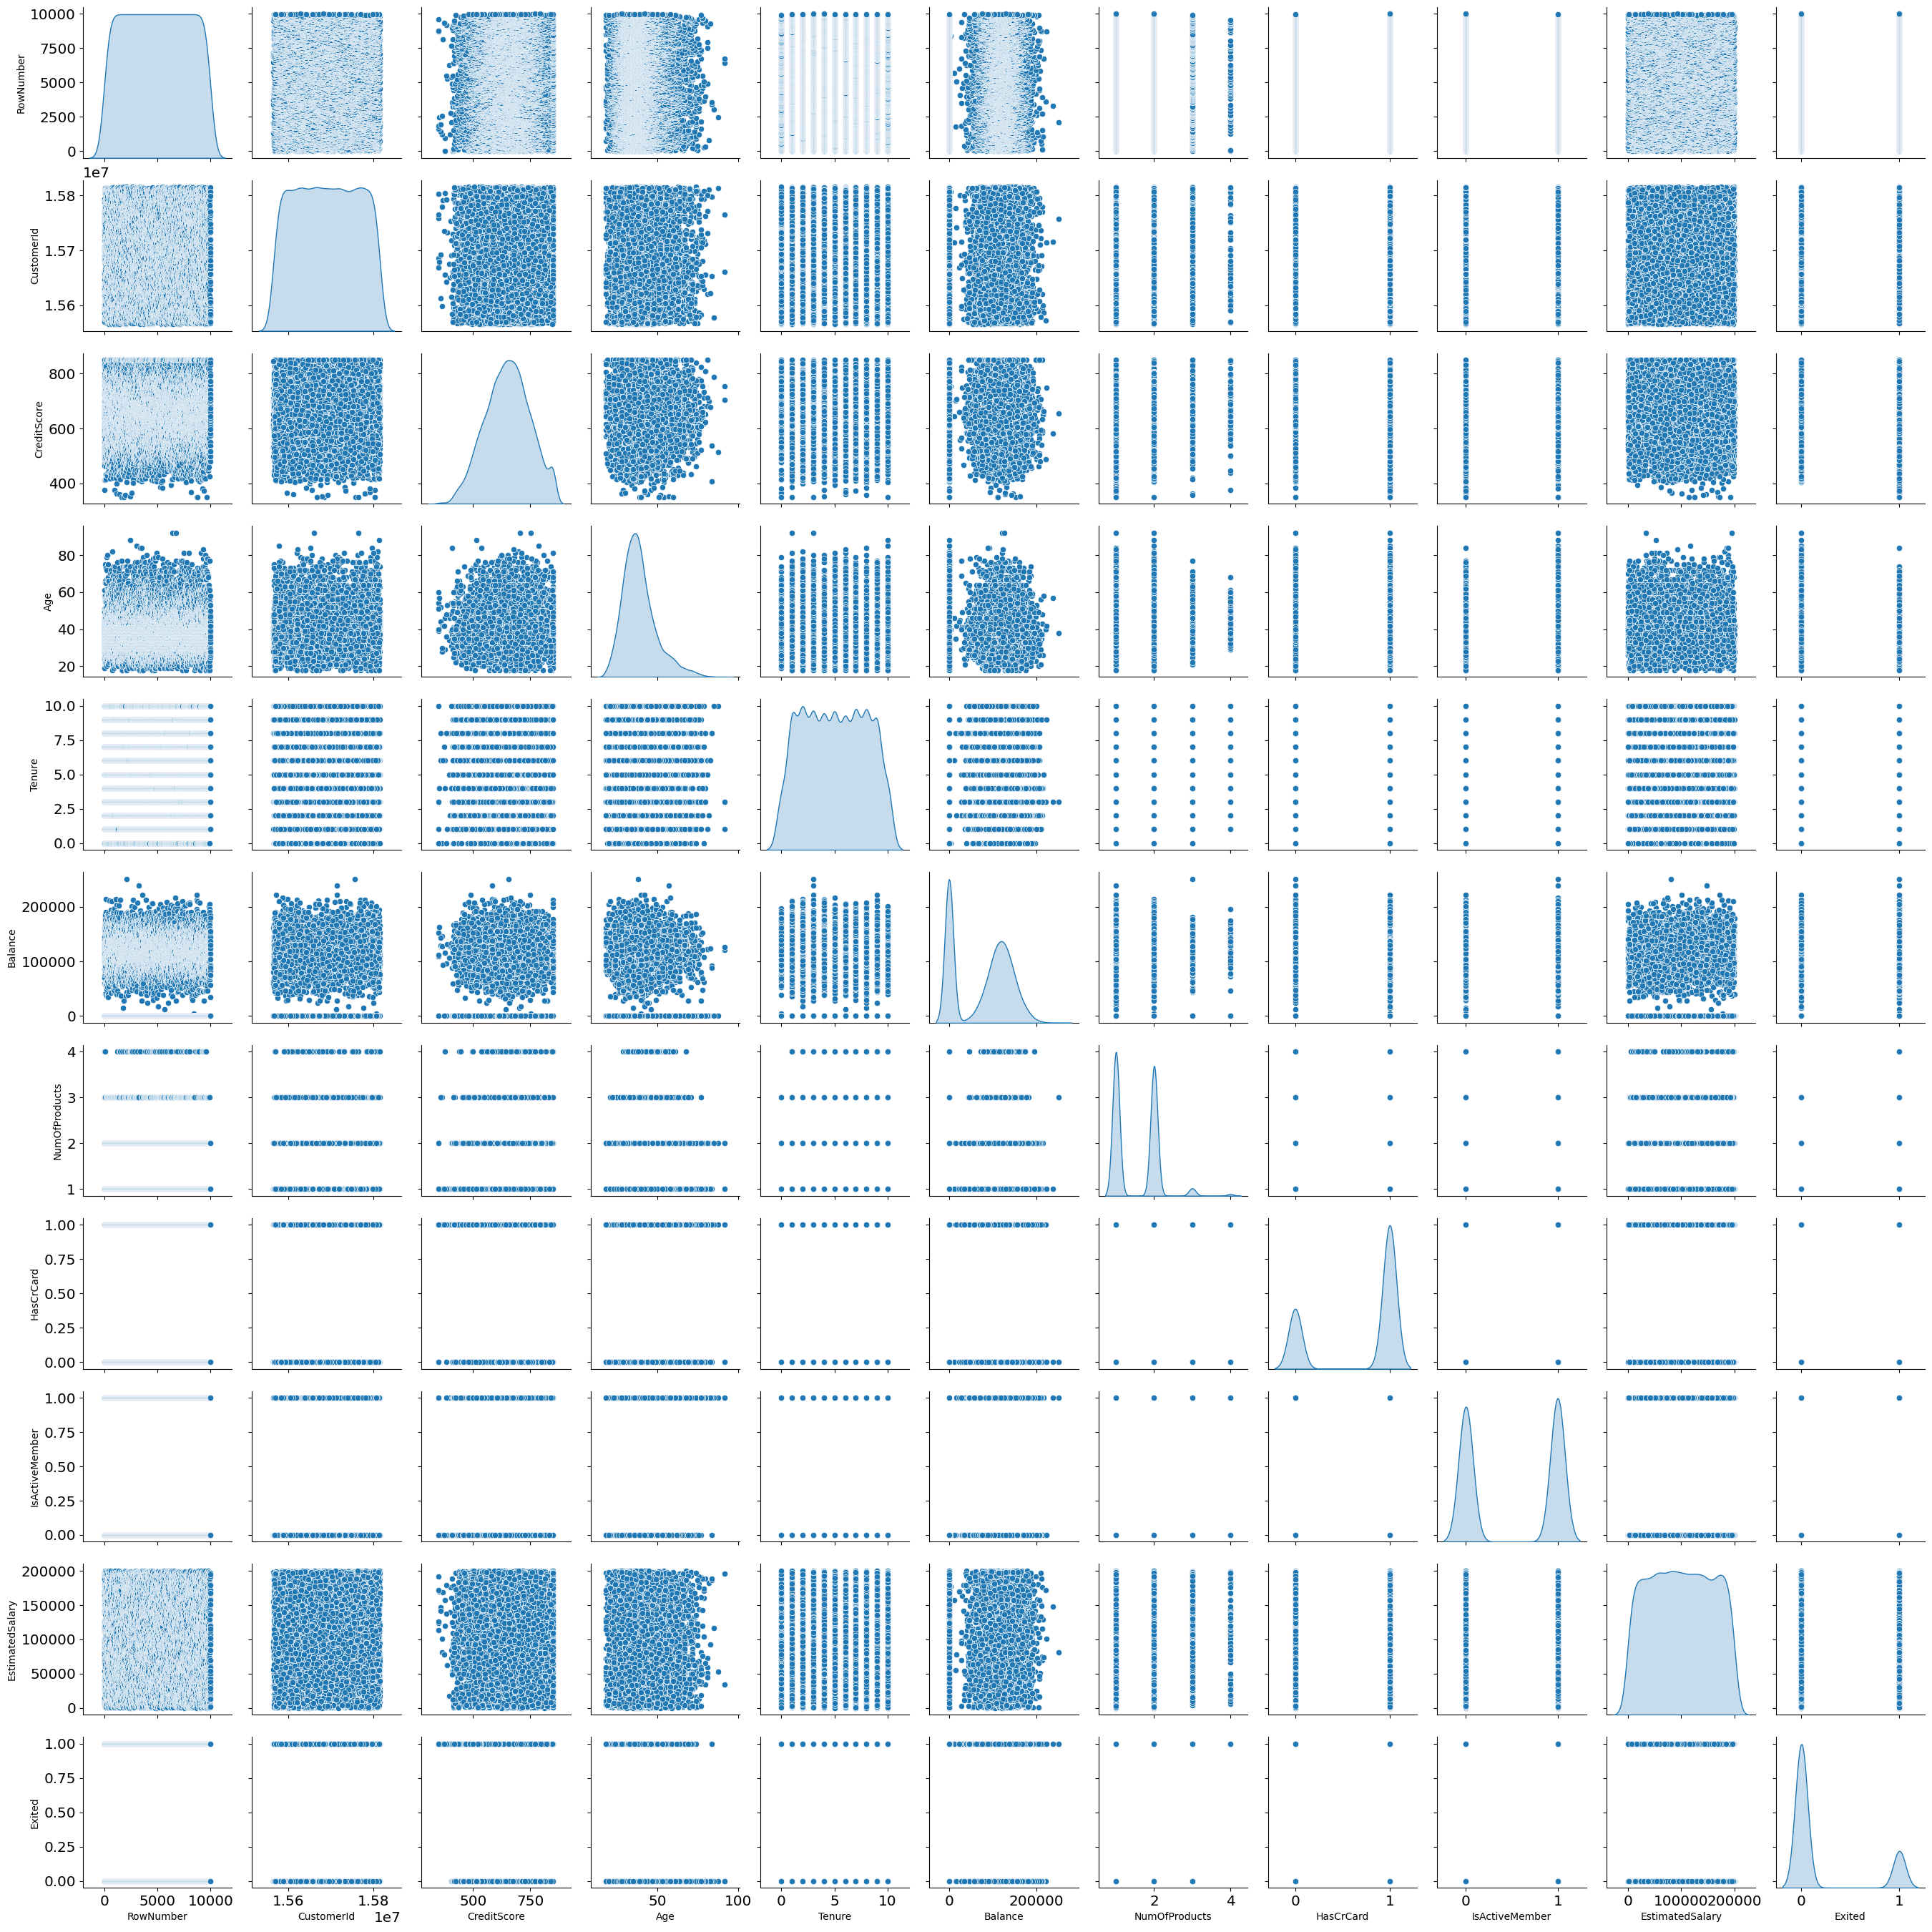

In [29]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\1312023106.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\1312023106.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\1312023106.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\1312023106.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\1312023106.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\1312023106.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\1312023106.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Leno

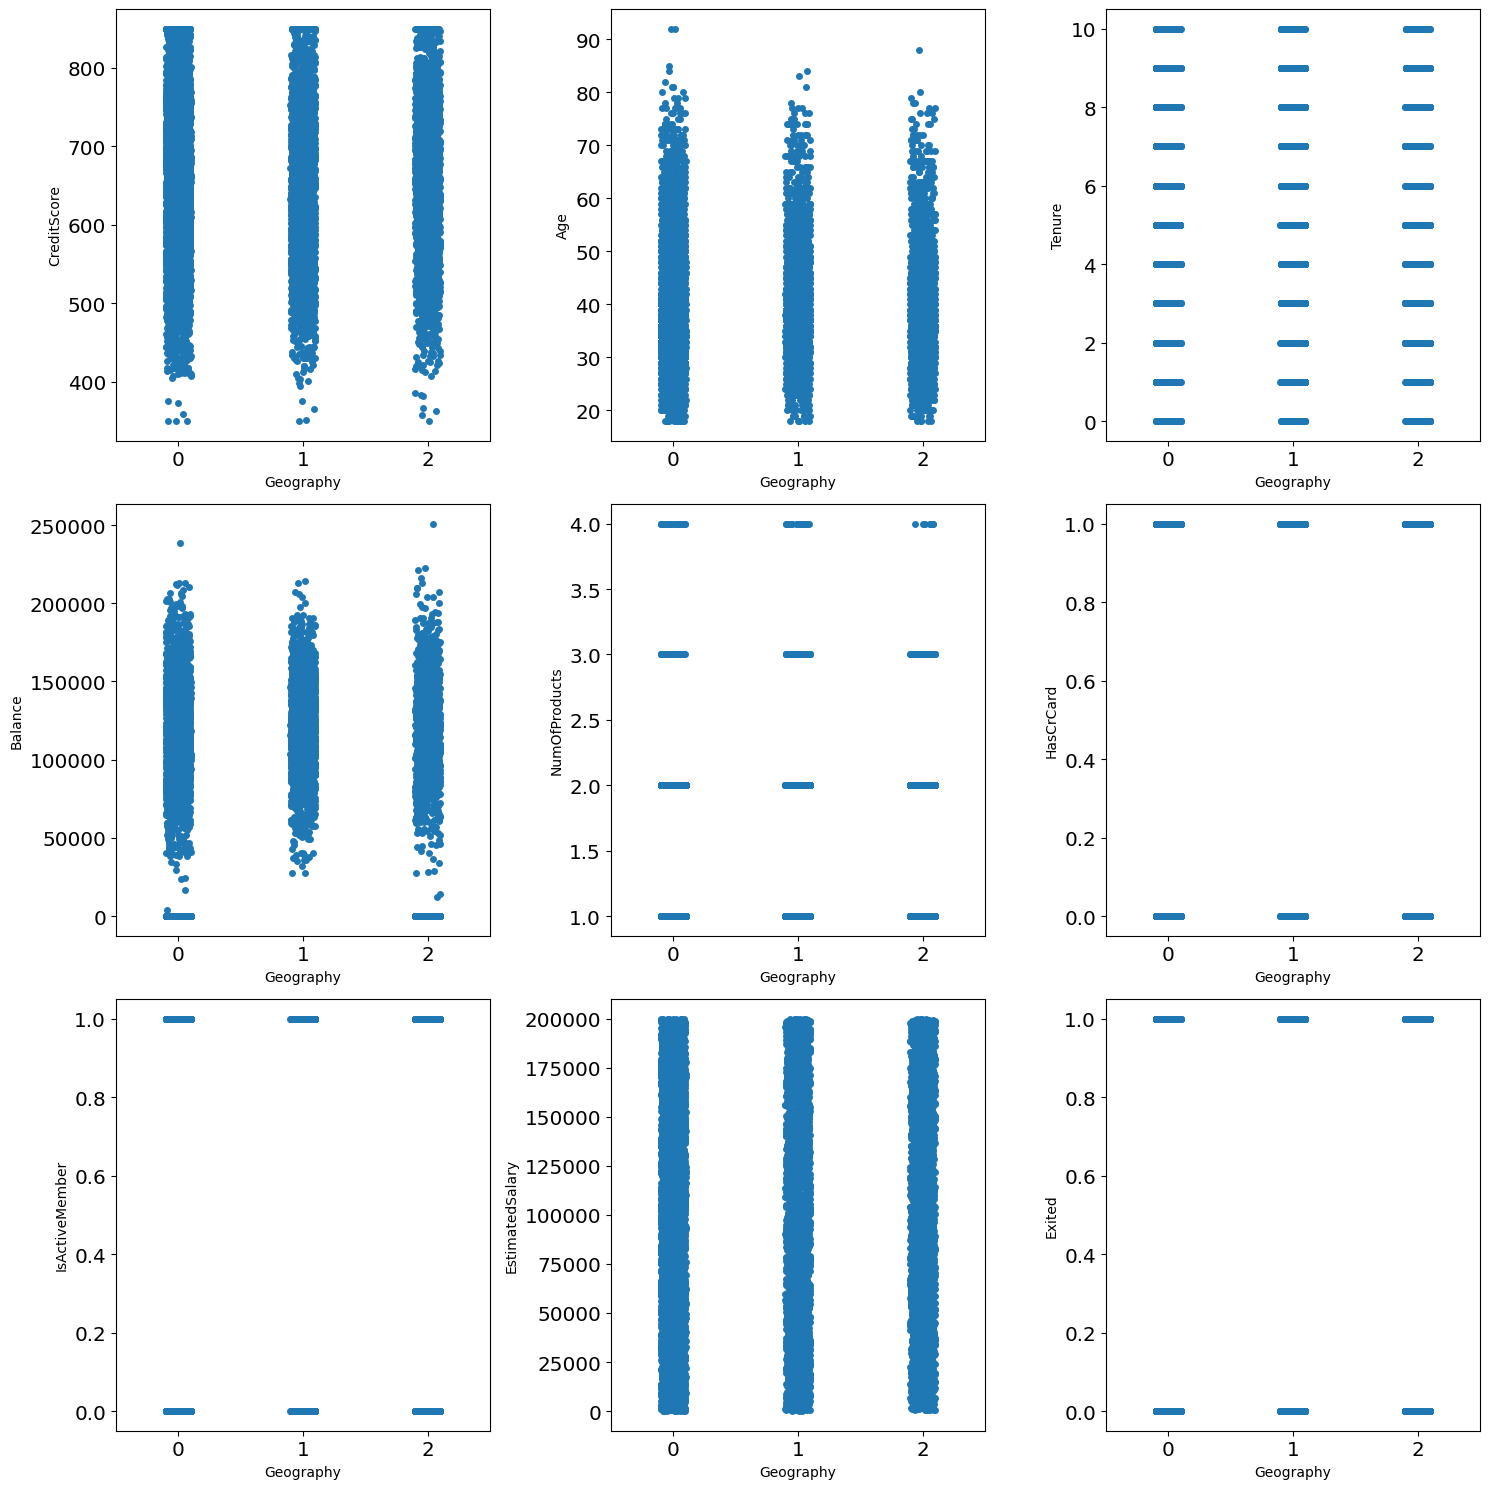

In [45]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Geography', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2503258180.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2503258180.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2503258180.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2503258180.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2503258180.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2503258180.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19640\2503258180.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Leno

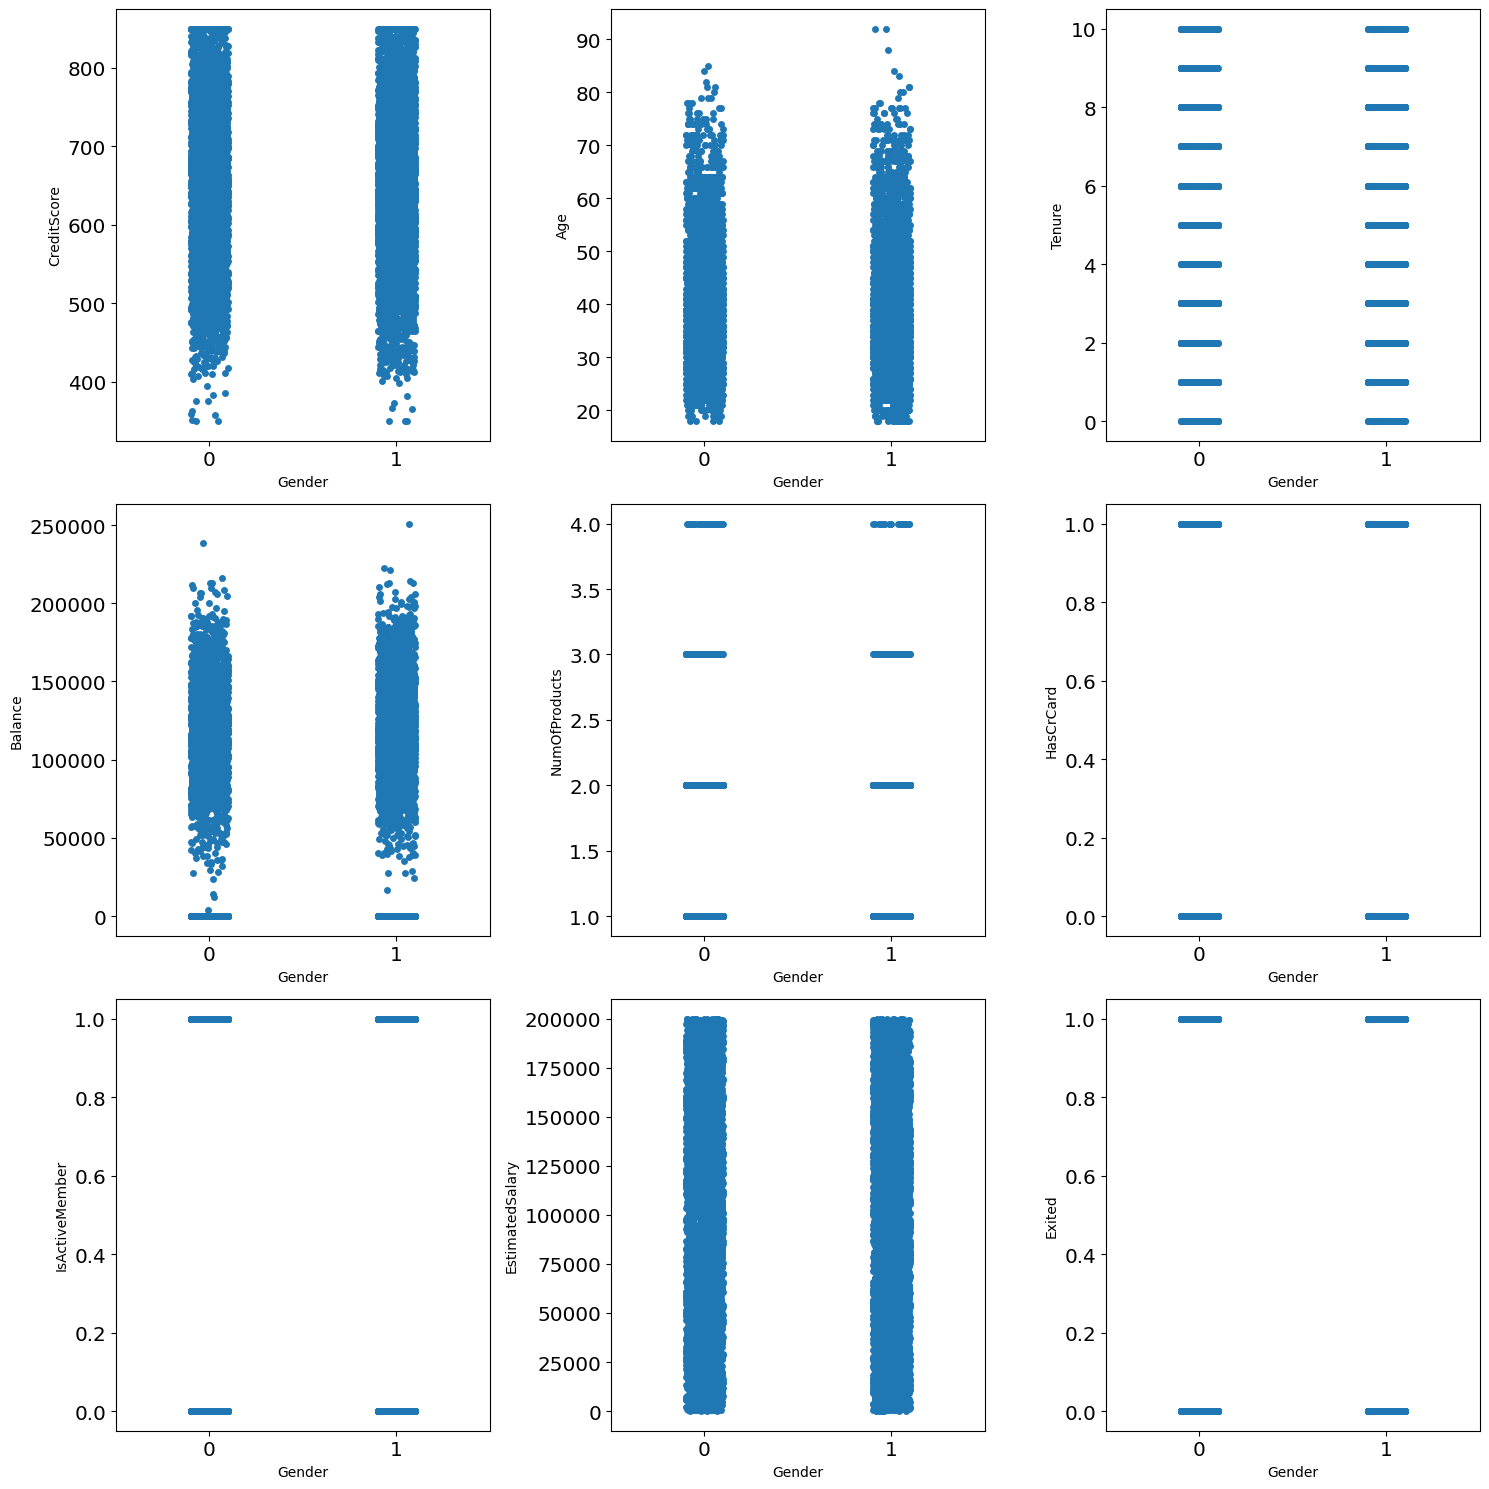

In [46]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Gender', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()